In [1]:
import IPython.display

IPython.display.Markdown('https://raw.githubusercontent.com/justmarkham/pycon-2019-tutorial/master/README.md')

# Data Science Best Practices with pandas

This tutorial was presented by Kevin Markham at PyCon on [May 2, 2019](https://us.pycon.org/2019/schedule/presentation/92/). Watch the complete [tutorial video](https://www.youtube.com/watch?v=dPwLlJkSHLo&list=PL5-da3qGB5ICCsgW1MxlZ0Hq8LL5U3u9y&index=36) on YouTube.

[![Data Science Best Practices with pandas](youtube.jpg)](https://www.youtube.com/watch?v=dPwLlJkSHLo&list=PL5-da3qGB5ICCsgW1MxlZ0Hq8LL5U3u9y&index=36 "Watch the complete tutorial video on YouTube")

## Jupyter Notebook

The tutorial code is available as a [Jupyter notebook](tutorial.ipynb). You can run this notebook in the cloud (no installation required) by clicking the "launch binder" button:

[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/justmarkham/pycon-2019-tutorial/master?filepath=tutorial.ipynb)

## What is the tutorial about?

The pandas library is a powerful tool for multiple phases of the data science workflow, including data cleaning, visualization, and exploratory data analysis. However, the size and complexity of the pandas library makes it challenging to discover the best way to accomplish any given task.

In this tutorial, you'll use pandas to answer questions about a real-world dataset. Through each exercise, you'll learn important data science skills as well as "best practices" for using pandas. By the end of the tutorial, you'll be more fluent at using pandas to correctly and efficiently answer your own data science questions.

## How well do I need to know pandas to participate?

You will get the most out of this tutorial if you are an intermediate pandas user, since the tutorial does not cover pandas basics.

- If you are new to pandas, I recommend watching some videos from my free [pandas course](https://www.dataschool.io/easier-data-analysis-with-pandas/) before the tutorial.
- If you just need a pandas refresher, I recommend reviewing this [Jupyter notebook](https://nbviewer.jupyter.org/github/justmarkham/pandas-videos/blob/master/pandas.ipynb), which includes all of the code from my pandas course.

## What dataset are we using?

`ted.csv` is the [TED Talks dataset](https://www.kaggle.com/rounakbanik/ted-talks) from Kaggle Datasets, made available under the [CC BY-NC-SA 4.0 license](https://creativecommons.org/licenses/by-nc-sa/4.0/).

## How do I download the CSV file from GitHub?

Here are three options that will work equally well:

- If you want to directly download only the CSV file, **right click on the following link** and select "Save As": [`ted.csv`](https://raw.githubusercontent.com/justmarkham/pycon-2019-tutorial/master/ted.csv).
- If you know how to use git, you can click the green button above and **clone the entire repository**.
- If you know how to open a ZIP file, you can click the green button above and **download the entire repository**.

## What do I need to do before the tutorial?

1. Make sure that [pandas](https://pandas.pydata.org/pandas-docs/stable/install.html) and [matplotlib](https://matplotlib.org/users/installing.html) are installed on your computer. (The easiest way to install pandas and matplotlib is by downloading the [Anaconda distribution](https://www.anaconda.com/distribution/).)
2. Download the CSV file from this repository.
3. Read the file into pandas using the `read_csv()` function to make sure everything is working.

## How can I check that pandas and matplotlib are properly installed?

1. Move the CSV file into your working directory. (This is usually the directory where you create Python scripts or notebooks.)
2. Open the Python environment of your choice.
3. If you're using the **Jupyter notebook**, run the following code:

    ```python
    import pandas as pd
	import matplotlib.pyplot as plt
	%matplotlib inline
	ted = pd.read_csv('ted.csv')
	ted.comments.plot()
	```

4. If you're using **any other Python environment**, run the following code:

    ```python
    import pandas as pd
	import matplotlib.pyplot as plt
	ted = pd.read_csv('ted.csv')
	ted.comments.plot()
	plt.show()
	```

If you don't get any error messages, and a plot appears on your screen, then it's very likely that pandas and matplotlib are installed correctly.

## Who is the instructor?

Kevin Markham is the founder of [Data School](https://www.dataschool.io/), an online school for learning data science with Python. He is passionate about teaching data science to people who are new to the field, regardless of their educational and professional backgrounds. Previously, Kevin was the lead data science instructor for General Assembly in Washington, DC. Currently, he teaches machine learning and data analysis to over 10,000 students each month through the Data School [YouTube channel](https://www.youtube.com/dataschool). He has a degree in Computer Engineering from Vanderbilt University and lives in Asheville, North Carolina with his wife and son.


$y_{i-1}$

In [7]:
import numpy as np
import pandas as pd
pd.set_option("display.max_rows", 18)

import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize': (20, 12),})
%config InlineBackend.figure_format = 'retina'

ted = pd.read_csv('https://raw.githubusercontent.com/justmarkham/pycon-2019-tutorial/master/ted.csv')

In [8]:
ted.memory_usage(deep=True)

Index                     128
comments                20400
description           1043362
duration                20400
event                  173496
film_date               20400
languages               20400
main_speaker           181080
name                   279049
num_speaker             20400
published_date          20400
ratings               1785240
related_talks         4661981
speaker_occupation     189664
tags                   387590
title                  237501
url                    331544
views                   20400
dtype: int64

In [9]:
ted.dtypes

comments               int64
description           object
duration               int64
event                 object
film_date              int64
languages              int64
main_speaker          object
name                  object
num_speaker            int64
published_date         int64
ratings               object
related_talks         object
speaker_occupation    object
tags                  object
title                 object
url                   object
views                  int64
dtype: object

In [10]:
ted.isna().sum()

comments              0
description           0
duration              0
event                 0
film_date             0
languages             0
main_speaker          0
name                  0
num_speaker           0
published_date        0
ratings               0
related_talks         0
speaker_occupation    6
tags                  0
title                 0
url                   0
views                 0
dtype: int64

## 2. Which talks provoke the most online discussion?

In [11]:
# sort by the number of first-level comments, though this is biased in favor of older talks
ted.sort_values('comments').tail()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
1787,2673,Our consciousness is a fundamental aspect of o...,1117,TED2014,1395100800,33,David Chalmers,David Chalmers: How do you explain consciousness?,1,1405350484,"[{'id': 25, 'name': 'OK', 'count': 280}, {'id'...","[{'id': 1308, 'hero': 'https://pe.tedcdn.com/i...",Philosopher,"['brain', 'consciousness', 'neuroscience', 'ph...",How do you explain consciousness?,https://www.ted.com/talks/david_chalmers_how_d...,2162764
201,2877,Jill Bolte Taylor got a research opportunity f...,1099,TED2008,1204070400,49,Jill Bolte Taylor,Jill Bolte Taylor: My stroke of insight,1,1205284200,"[{'id': 22, 'name': 'Fascinating', 'count': 14...","[{'id': 184, 'hero': 'https://pe.tedcdn.com/im...",Neuroanatomist,"['biology', 'brain', 'consciousness', 'global ...",My stroke of insight,https://www.ted.com/talks/jill_bolte_taylor_s_...,21190883
644,3356,"Questions of good and evil, right and wrong ar...",1386,TED2010,1265846400,39,Sam Harris,Sam Harris: Science can answer moral questions,1,1269249180,"[{'id': 8, 'name': 'Informative', 'count': 923...","[{'id': 666, 'hero': 'https://pe.tedcdn.com/im...","Neuroscientist, philosopher","['culture', 'evolutionary psychology', 'global...",Science can answer moral questions,https://www.ted.com/talks/sam_harris_science_c...,3433437
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110
96,6404,Richard Dawkins urges all atheists to openly s...,1750,TED2002,1012608000,42,Richard Dawkins,Richard Dawkins: Militant atheism,1,1176689220,"[{'id': 3, 'name': 'Courageous', 'count': 3236...","[{'id': 86, 'hero': 'https://pe.tedcdn.com/ima...",Evolutionary biologist,"['God', 'atheism', 'culture', 'religion', 'sci...",Militant atheism,https://www.ted.com/talks/richard_dawkins_on_m...,4374792


In [12]:
# correct for this bias by calculating the number of comments per view
ted['comments_per_view'] = ted.comments / ted.views
ted.sort_values('comments_per_view',ascending=True)

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views,comments_per_view
2534,2,What the astronauts felt when they saw Earth f...,725,TEDxSkoll,1491523200,1,Benjamin Grant,Benjamin Grant: What it feels like to see Eart...,1,1504814438,"[{'id': 10, 'name': 'Inspiring', 'count': 46},...","[{'id': 2511, 'hero': 'https://pe.tedcdn.com/i...",Author,"['TEDx', 'art', 'climate change', 'environment...",What it feels like to see Earth from space,https://www.ted.com/talks/benjamin_grant_what_...,646174,0.000003
2501,3,"Meet Françoise Mouly, The New Yorker's art dir...",509,TEDNYC,1488931200,12,Françoise Mouly,Françoise Mouly: The stories behind The New Yo...,1,1501770244,"[{'id': 7, 'name': 'Funny', 'count': 10}, {'id...","[{'id': 2479, 'hero': 'https://pe.tedcdn.com/i...",Art editor,"['TEDNYC', 'art', 'creativity', 'culture', 'de...",The stories behind The New Yorker's iconic covers,https://www.ted.com/talks/francoise_mouly_the_...,839040,0.000004
2542,3,In the century-old statues that occupy Cape To...,795,TEDGlobal 2017,1503792000,1,Sethembile Msezane,Sethembile Msezane: Living sculptures that sta...,1,1505488093,"[{'id': 1, 'name': 'Beautiful', 'count': 41}, ...","[{'id': 2873, 'hero': 'https://pe.tedcdn.com/i...",Artist,"['Africa', 'activism', 'art', 'community', 'hi...",Living sculptures that stand for history's truths,https://www.ted.com/talks/sethembile_msezane_l...,542088,0.000006
2528,3,Digital archaeologist Chance Coughenour is usi...,717,TEDxHamburg,1465344000,5,Chance Coughenour,Chance Coughenour: How your pictures can help ...,1,1504209631,"[{'id': 9, 'name': 'Ingenious', 'count': 16}, ...","[{'id': 2673, 'hero': 'https://pe.tedcdn.com/i...",Digital archaeologist,"['TEDx', 'ancient world', 'archaeology', 'cons...",How your pictures can help reclaim lost history,https://www.ted.com/talks/chance_coughenour_ho...,539207,0.000006
2494,7,Jimmy Lin is developing technologies to catch ...,730,TED2017,1492992000,10,Jimmy Lin,Jimmy Lin: A simple new blood test that can ca...,1,1500994384,"[{'id': 1, 'name': 'Beautiful', 'count': 7}, {...","[{'id': 2498, 'hero': 'https://pe.tedcdn.com/i...",Geneticist,"['DNA', 'TED Fellows', 'biology', 'cancer', 'd...",A simple new blood test that can catch cancer ...,https://www.ted.com/talks/jimmy_lin_a_simple_n...,1005506,0.000007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
954,2492,Janet Echelman found her true voice as an arti...,566,TED2011,1299110400,35,Janet Echelman,Janet Echelman: Taking imagination seriously,1,1307489760,"[{'id': 23, 'name': 'Jaw-dropping', 'count': 3...","[{'id': 453, 'hero': 'https://pe.tedcdn.com/im...",Artist,"['art', 'cities', 'culture', 'data', 'design',...",Taking imagination seriously,https://www.ted.com/talks/janet_echelman,1832930,0.001360
694,1502,Filmmaker Sharmeen Obaid-Chinoy takes on a ter...,489,TED2010,1265760000,32,Sharmeen Obaid-Chinoy,Sharmeen Obaid-Chinoy: Inside a school for sui...,1,1274865960,"[{'id': 23, 'name': 'Jaw-dropping', 'count': 3...","[{'id': 171, 'hero': 'https://pe.tedcdn.com/im...",Filmmaker,"['TED Fellows', 'children', 'culture', 'film',...",Inside a school for suicide bombers,https://www.ted.com/talks/sharmeen_obaid_chino...,1057238,0.001421
96,6404,Richard Dawkins urges all atheists to openly s...,1750,TED2002,1012608000,42,Richard Dawkins,Richard Dawkins: Militant atheism,1,1176689220,"[{'id': 3, 'name': 'Courageous', 'count': 3236...","[{'id': 86, 'hero': 'https://pe.tedcdn.com/ima...",Evolutionary biologist,"['God', 'atheism', 'culture', 'religion', 'sci...",Militant atheism,https://www.ted.com/talks/richard_dawkins_on_m...,4374792,0.001464
803,834,David Bismark demos a new system for voting th...,422,TEDGlobal 2010,1279065600,36,David Bismark,David Bismark: E-voting without fraud,1,1288685640,"[{'id': 25, 'name': 'OK', 'count': 111}, {'id'...","[{'id': 803, 'hero': 'https://pe.tedcdn.com/im

In [51]:
import datetime as dt
ted['date'] = ted.published_date.apply(lambda x: dt.datetime.fromtimestamp(x))
ted.date.sort_values()

0      2006-06-27 02:11:00
1      2006-06-27 02:11:00
2      2006-06-27 02:11:00
3      2006-06-27 02:11:00
4      2006-06-27 22:38:00
               ...        
2545   2017-09-19 22:00:16
2546   2017-09-20 17:02:17
2547   2017-09-21 17:01:35
2548   2017-09-21 22:00:42
2549   2017-09-22 17:00:22
Name: date, Length: 2550, dtype: datetime64[ns]

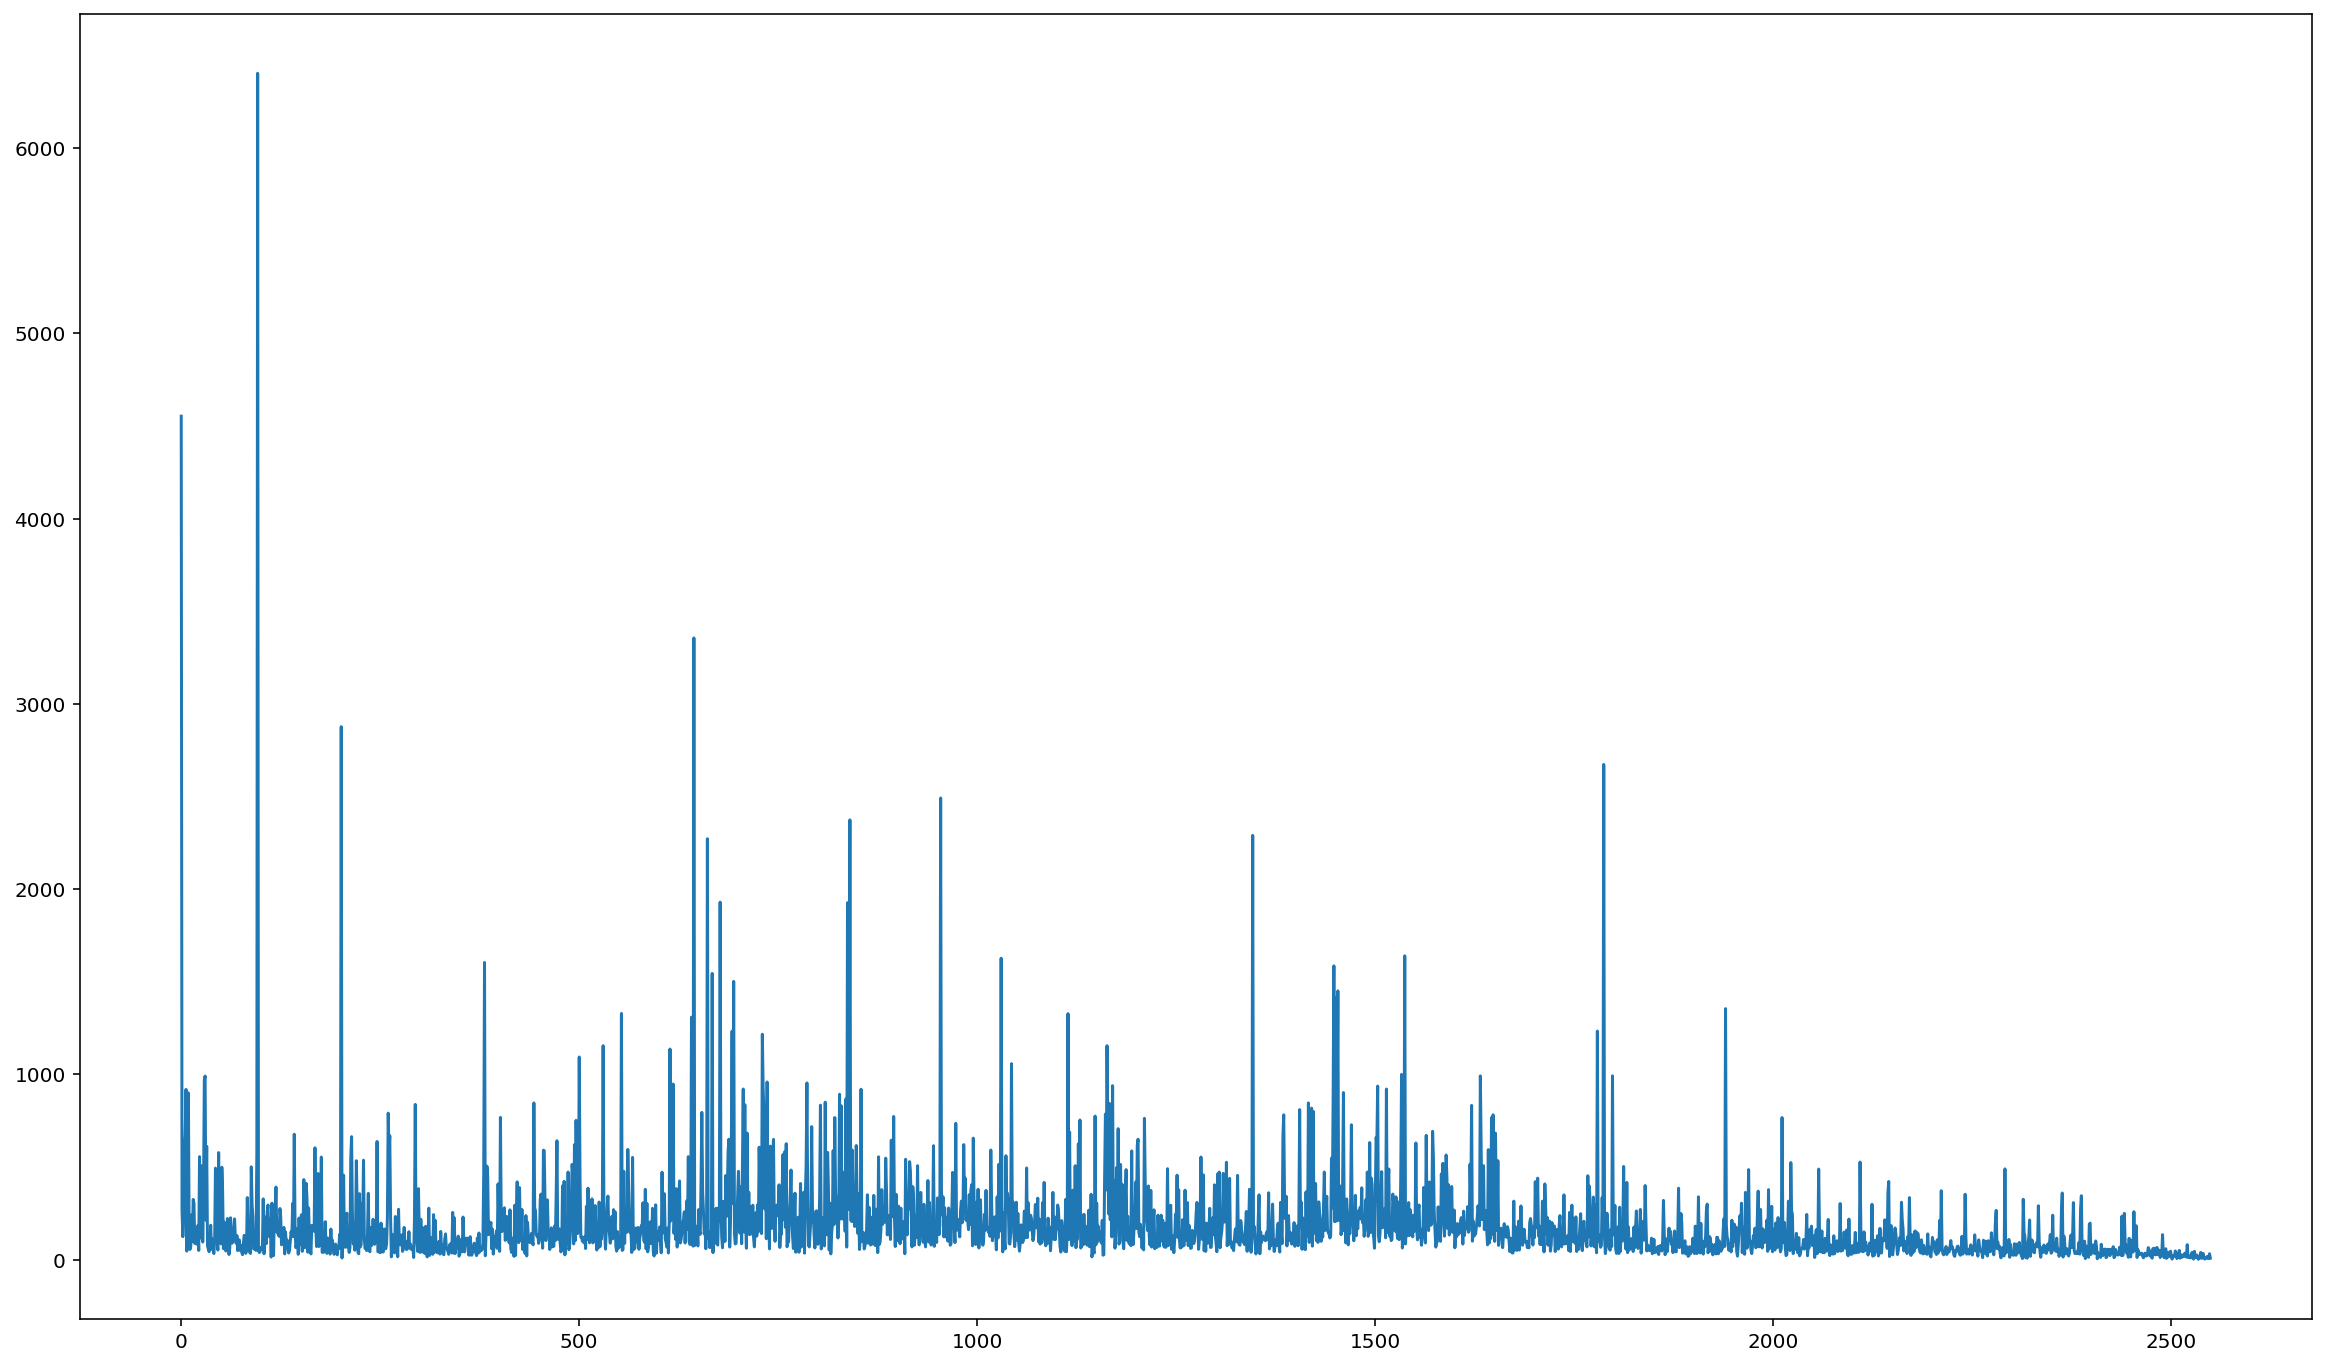

In [13]:
ted.comments.plot();

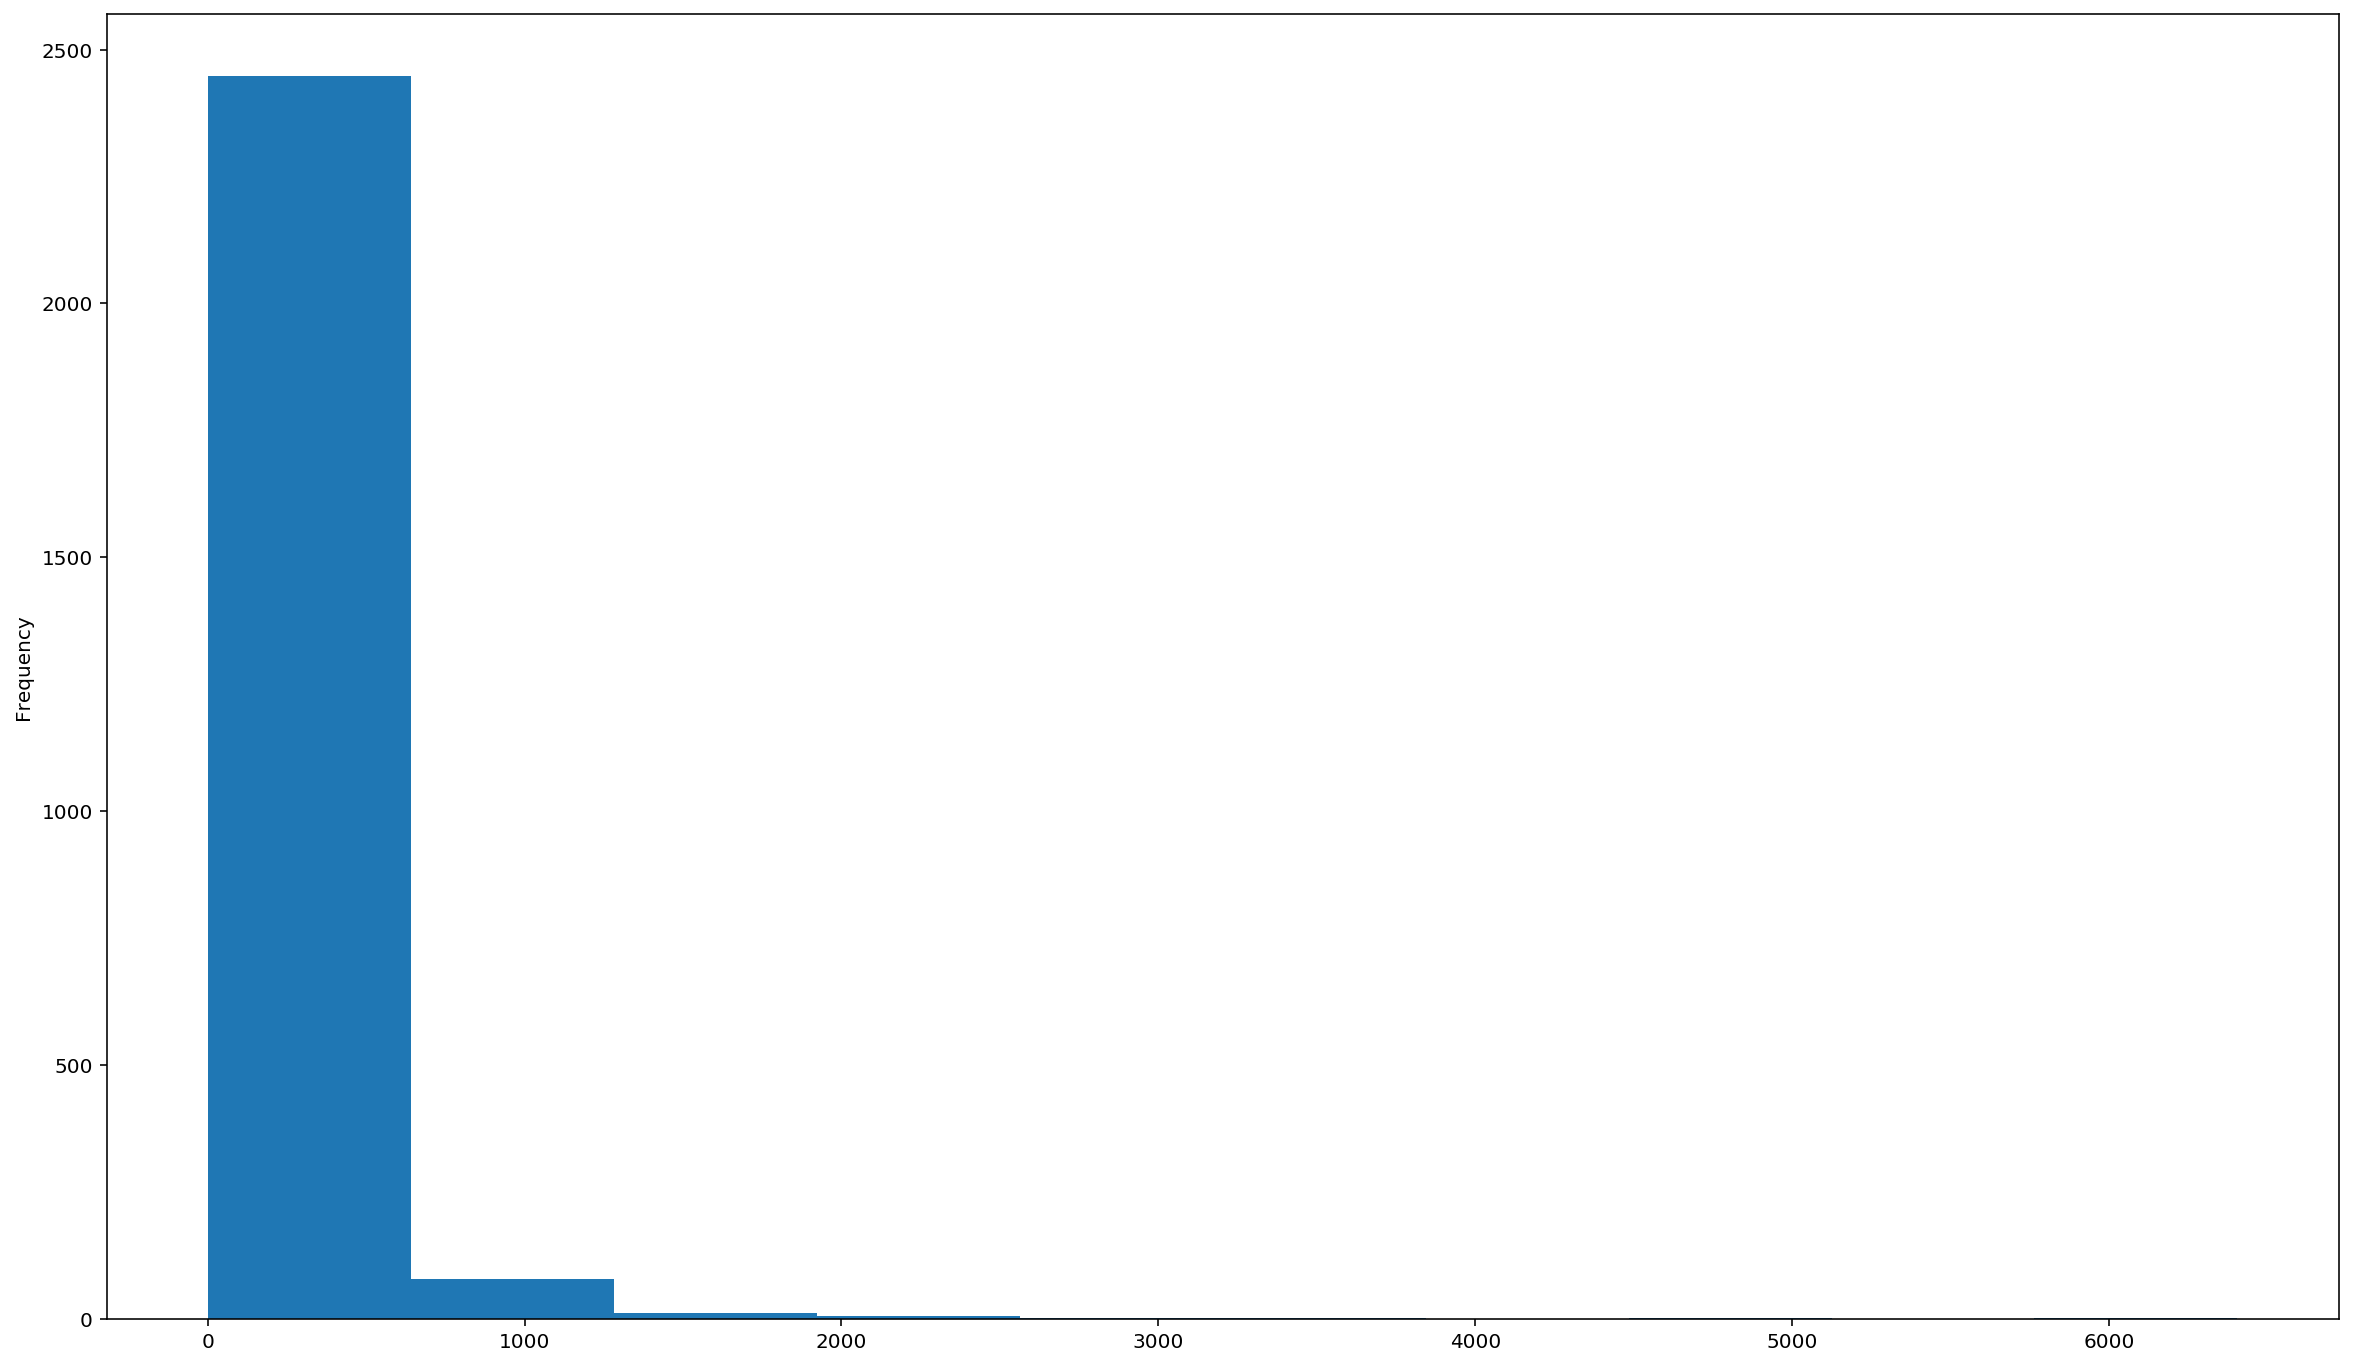

In [14]:
ted.comments.plot(kind='hist');

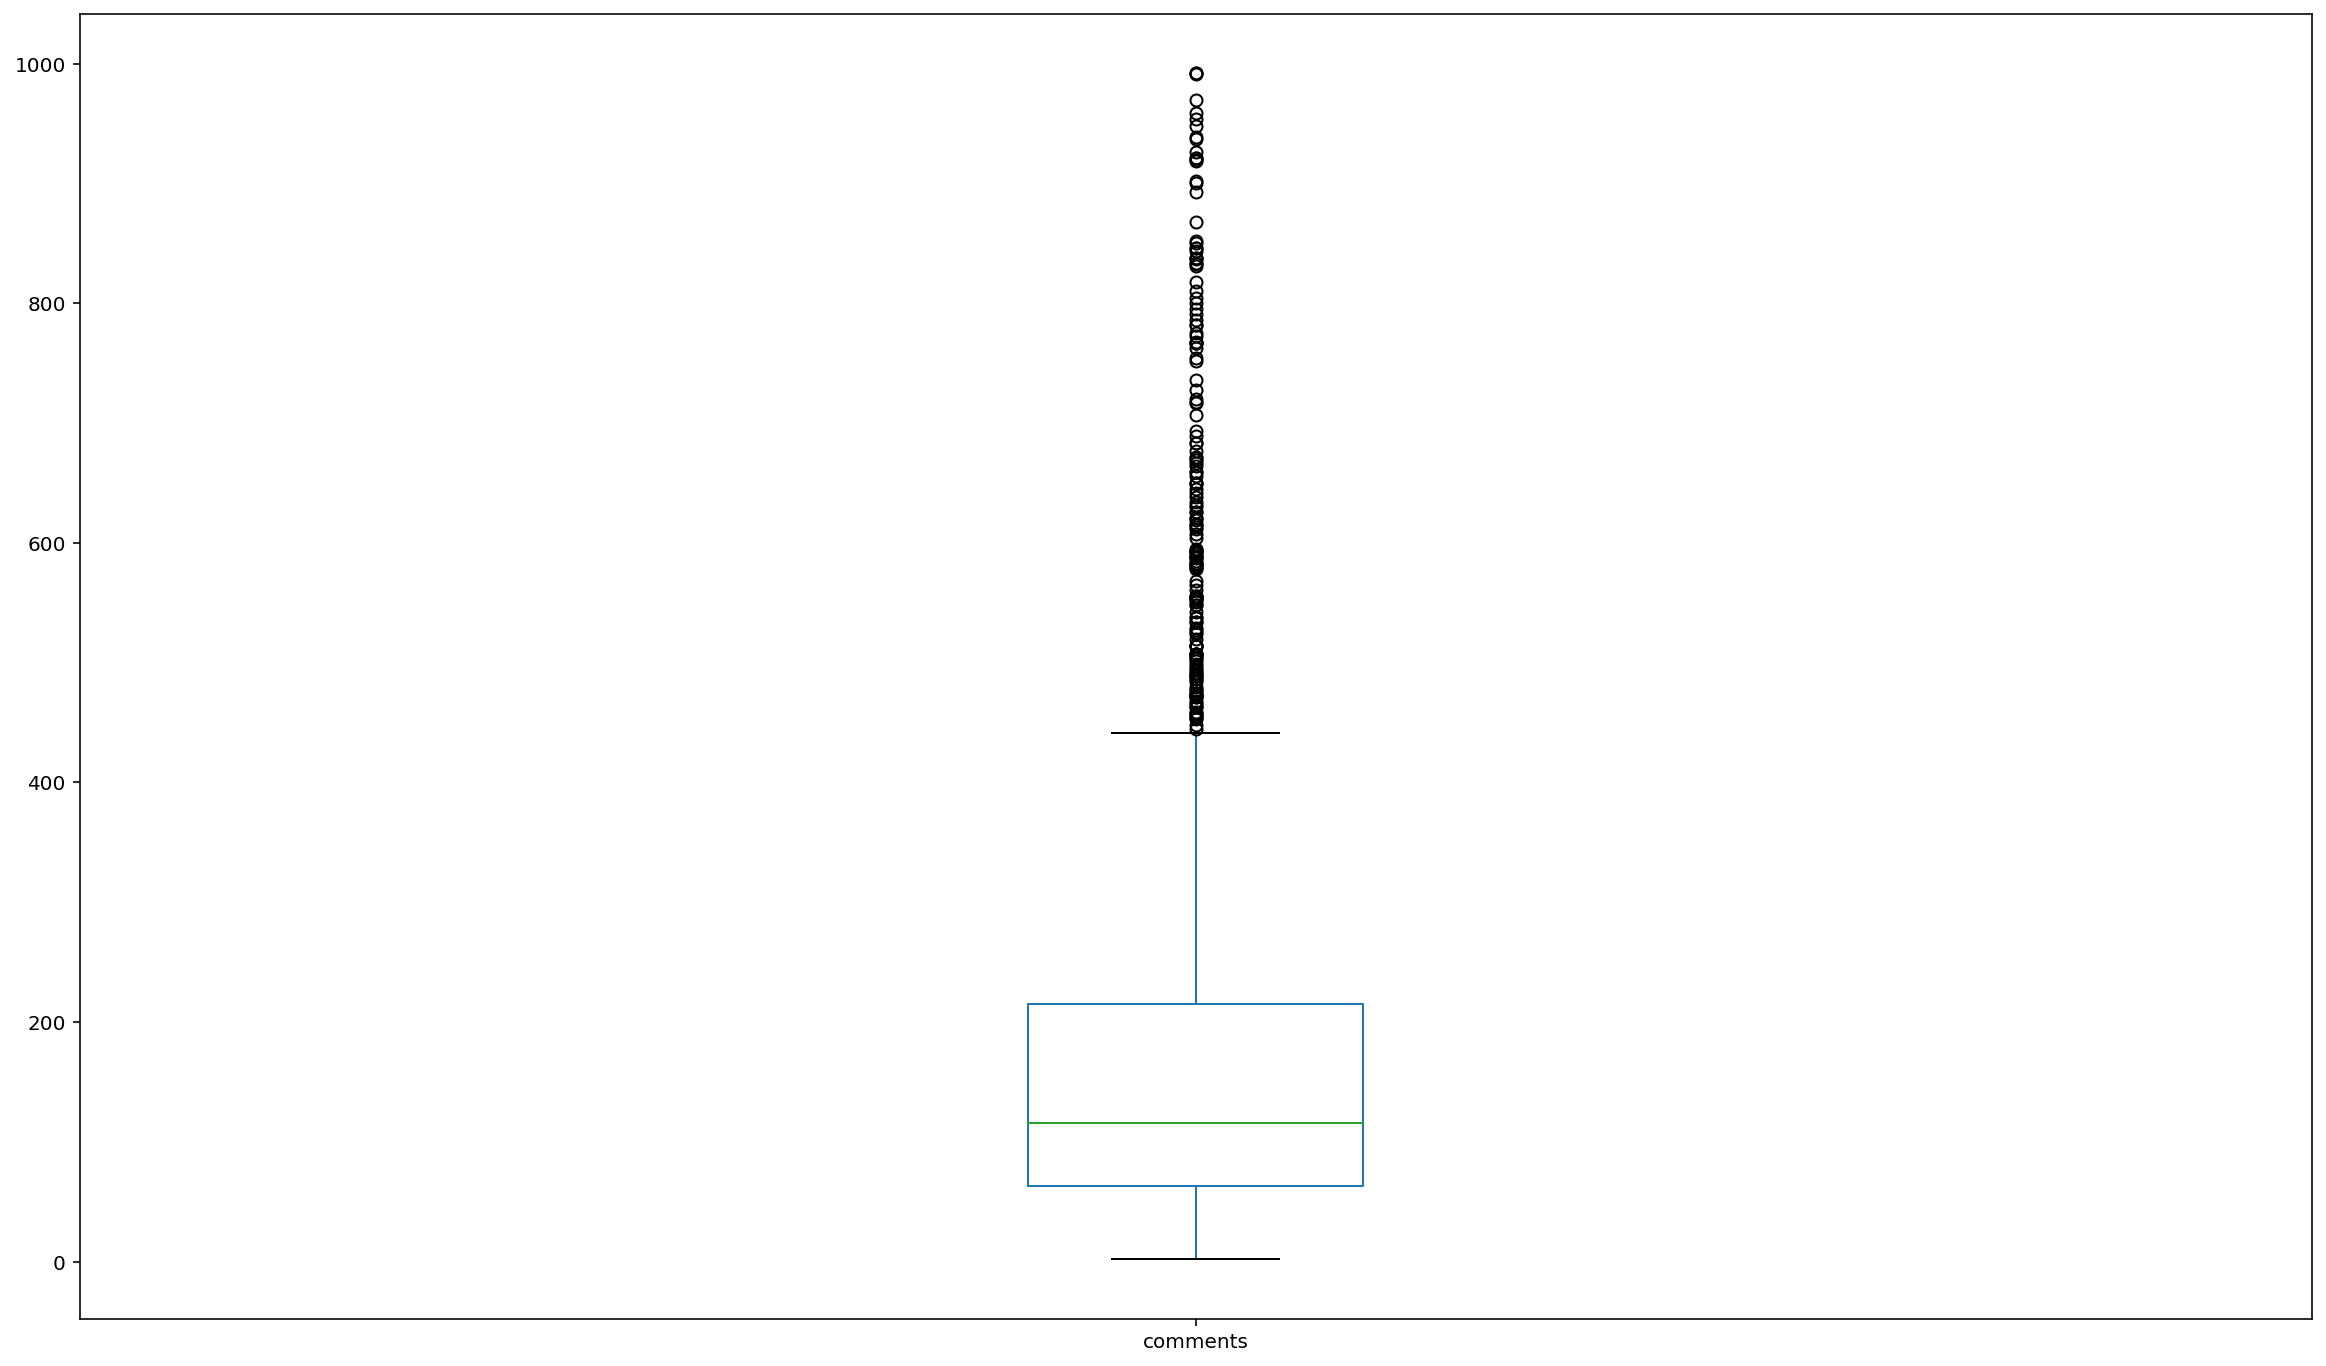

In [15]:
ted.loc[ted.comments < 1000, 'comments'].plot(kind='box');

In [16]:

# count the number of talks (great if you value variety, but they may not be great talks)
ted.event.value_counts().head()

TED2014    84
TED2009    83
TED2016    77
TED2013    77
TED2015    75
Name: event, dtype: int64

In [14]:
# use views as a proxy for "quality of talk"
ted.groupby('event').views.mean().head()

event
AORN Congress                  149818.0
Arbejdsglaede Live             971594.0
BBC TV                         521974.0
Bowery Poetry Club             676741.0
Business Innovation Factory    304086.0
Name: views, dtype: float64

In [15]:

# find the largest values, but we don't know how many talks are being averaged
ted.groupby('event').views.mean().sort_values().tail()

event
TEDxNorrkoping        6569493.0
TEDxCreativeCoast     8444981.0
TEDxBloomington       9484259.5
TEDxHouston          16140250.5
TEDxPuget Sound      34309432.0
Name: views, dtype: float64

In [16]:

# find the largest values, but we don't know how many talks are being averaged
ted.groupby('event').views.mean().sort_values().tail()


event
TEDxNorrkoping        6569493.0
TEDxCreativeCoast     8444981.0
TEDxBloomington       9484259.5
TEDxHouston          16140250.5
TEDxPuget Sound      34309432.0
Name: views, dtype: float64

# Notes

In [10]:
ted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2550 entries, 0 to 2549
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   comments            2550 non-null   int64  
 1   description         2550 non-null   object 
 2   duration            2550 non-null   int64  
 3   event               2550 non-null   object 
 4   film_date           2550 non-null   int64  
 5   languages           2550 non-null   int64  
 6   main_speaker        2550 non-null   object 
 7   name                2550 non-null   object 
 8   num_speaker         2550 non-null   int64  
 9   published_date      2550 non-null   int64  
 10  ratings             2550 non-null   object 
 11  related_talks       2550 non-null   object 
 12  speaker_occupation  2544 non-null   object 
 13  tags                2550 non-null   object 
 14  title               2550 non-null   object 
 15  url                 2550 non-null   object 
 16  views 

## Query the columns of a DataFrame with a boolean expression.

pd.DataFrame.query(self, expr, inplace=False, **kwargs)


Parameters
----------
expr : str
    The query string to evaluate.

    You can refer to variables
    in the environment by prefixing them with an '@' character like ``@a + b``.


In [17]:
ted.query('duration < 150')

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views,comments_per_view
239,76,After speaking at TED2007 on elegance in physi...,135,TED2007,1172880000,61,Murray Gell-Mann,Murray Gell-Mann: The ancestor of language,1,1213146000,"[{'id': 22, 'name': 'Fascinating', 'count': 78...","[{'id': 161, 'hero': 'https://pe.tedcdn.com/im...",Physicist,"['culture', 'global issues', 'history', 'langu...",The ancestor of language,https://www.ted.com/talks/murray_gell_mann_on_...,785293,0.000097
248,42,Singer-songwriter Nellie McKay performs the se...,140,TED2008,1204243200,39,Nellie McKay,"Nellie McKay: ""Clonie""",1,1214528400,"[{'id': 25, 'name': 'OK', 'count': 104}, {'id'...","[{'id': 325, 'hero': 'https://pe.tedcdn.com/im...",Singer/songwriter,"['culture', 'entertainment', 'genetics', 'live...","""Clonie""",https://www.ted.com/talks/nellie_mckay_sings_c...,680591,0.000062
454,62,Yves Behar and Forrest North unveil Mission On...,143,TED2009,1233878400,45,Yves Behar,Yves Behar: A supercharged motorcycle design,1,1242982440,"[{'id': 7, 'name': 'Funny', 'count': 30}, {'id...","[{'id': 266, 'hero': 'https://pe.tedcdn.com/im...",Designer,"['cars', 'design', 'engineering', 'green', 'tr...",A supercharged motorcycle design,https://www.ted.com/talks/yves_behar_s_superch...,556657,0.000111
547,46,"The euphonium, with its sweet brass sound, is ...",141,TEDGlobal 2009,1248307200,0,Matthew White,Matthew White: The modern euphonium,1,1256864400,"[{'id': 9, 'name': 'Ingenious', 'count': 43}, ...","[{'id': 478, 'hero': 'https://pe.tedcdn.com/im...",Brass virtuoso,"['creativity', 'live music', 'music', 'perform...",The modern euphonium,https://www.ted.com/talks/matthew_white_gives_...,771962,0.000060


we can also search data frames using objects which are in-memory such as the keys of a dictionary, a list, or a set by including the name of the object preceded by an “@” sign

In [18]:
EVENTS = ['TED2007', 'TED2008']
ted.query('event in @EVENTS')  

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views,comments_per_view
63,97,"Accepting the 2007 TED Prize, Bill Clinton ask...",1447,TED2007,1173312000,26,Bill Clinton,Bill Clinton: My wish: Rebuilding Rwanda,1,1175559060,"[{'id': 9, 'name': 'Ingenious', 'count': 37}, ...","[{'id': 59, 'hero': 'https://pe.tedcdn.com/ima...",Activist,"['Africa', 'TED Prize', 'business', 'culture',...",My wish: Rebuilding Rwanda,https://www.ted.com/talks/bill_clinton_on_rebu...,849859,0.000114
64,89,"As E.O. Wilson accepts his 2007 TED Prize, he ...",1355,TED2007,1173312000,26,E.O. Wilson,E.O. Wilson: My wish: Build the Encyclopedia o...,1,1175559060,"[{'id': 9, 'name': 'Ingenious', 'count': 60}, ...","[{'id': 340, 'hero': 'https://pe.tedcdn.com/im...",Biologist,"['TED Prize', 'ants', 'biodiversity', 'biology...",My wish: Build the Encyclopedia of Life,https://www.ted.com/talks/e_o_wilson_on_saving...,1335732,0.000067
65,107,"Accepting his 2007 TED Prize, war photographer...",1316,TED2007,1173312000,23,James Nachtwey,James Nachtwey: My wish: Let my photographs be...,1,1175559060,"[{'id': 3, 'name': 'Courageous', 'count': 637}...","[{'id': 56, 'hero': 'https://pe.tedcdn.com/ima...",Photojournalist,"['activism', 'art', 'culture', 'global issues'...",My wish: Let my photographs bear witness,https://www.ted.com/talks/james_nachtwey_s_sea...,1262674,0.000085
108,260,Blaise Aguera y Arcas leads a dazzling demo of...,450,TED2007,1172880000,34,Blaise Agüera y Arcas,Blaise Agüera y Arcas: How PhotoSynth can conn...,1,1180226220,"[{'id': 1, 'name': 'Beautiful', 'count': 632},...","[{'id': 147, 'hero': 'https://pe.tedcdn.com/im...",Software architect,"['collaboration', 'demo', 'microsoft', 'photog...",How PhotoSynth can connect the world's images,https://www.ted.com/talks/blaise_aguera_y_arca...,4772595,0.000054
109,295,"""I don't think we're going to make it,"" John D...",1072,TED2007,1172880000,20,John Doerr,John Doerr: Salvation (and profit) in greentech,1,1180266840,"[{'id': 3, 'name': 'Courageous', 'count': 174}...","[{'id': 192, 'hero': 'https://pe.tedcdn.com/im...",Venture capitalist,"['climate change', 'environment', 'global issu...",Salvation (and profit) in greentech,https://www.ted.com/talks/john_doerr_sees_salv...,805111,0.000366
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
459,287,"Kaki King, the first female on Rolling Stone's...",889,TED2008,1204329600,28,Kaki King,"Kaki King: Playing ""Pink Noise"" on guitar",1,1243558800,"[{'id': 1, 'name': 'Beautiful', 'count': 561},...","[{'id': 287, 'hero': 'https://pe.tedcdn.com/im...",Guitarist,"['guitar', 'innovation', 'music', 'performance...","Playing ""Pink Noise"" on guitar",https://www.ted.com/talks/kaki_king_rocks_out_...,1054415,0.000272
477,42,"In this uplifting talk, Katherine Fulton sketc...",754,TED2007,1173484800,26,Katherine Fulton,Katherine Fulton: You are the future of philan...,1,1245891600,"[{'id': 22, 'name': 'Fascinating', 'count': 38...","[{'id': 157, 'hero': 'https://pe.tedcdn.com/im...",New philanthropist,"['activism', 'community', 'global issues', 'ph...",You are the future of philanthropy,https://www.ted.com/talks/katherine_fulton_you...,437529,0.000096
482,26,The legendary design team Charles and Ray Eame...,908,TED2007,1170374400,20,Eames Demetrios,Eames Demetrios: The design genius of Charles ...,1,1246842000,"[{'id': 2, 'name': 'Confusing', 'count': 94}, ...","[{'id': 520, 'hero': 'https://pe.tedcdn.com/im...",Artist,"['children', 'creativity', 'design', 'film', '...",The design genius of Charles + Ray Eames,https://www.ted.com/talks/the_design_genius_of...,594111,0.000044
667,1545,Legendary skeptic James Randi takes a fatal do...,1039,TED2007,1170374400,36,James Randi,"James Randi: Homeopathy, quackery and fraud",1,1271690880,"[{'id': 8, 'name': 'Informative', 'count': 757...","[{'id': 22, 'hero': 'https://pe.tedcdn.com/ima...",Ske

In [19]:
SPEAKER = ['Bill Clinton', 'Bill Gates', 'Michio Kaku', 'Brian Greene']
ted.query('main_speaker in @SPEAKER')['name']

63               Bill Clinton: My wish: Rebuilding Rwanda
220           Brian Greene: Making sense of string theory
380          Bill Gates: Mosquitos, malaria and education
618                       Bill Gates: Innovating to zero!
882     Bill Gates: How state budgets are breaking US ...
1210     Brian Greene: Is our universe the only universe?
1496              Bill Gates: Teachers need real feedback
1950       Bill Gates: The next outbreak? We’re not ready
Name: name, dtype: object

features in the query function, like the option to use Python syntax engines instead of SQL ones, replacing the current DataFrame with the result of the query, and other logical operators 

In [ ]:
df.query('column_a.str.contains("abc") or column_b.str.contains("xyz") and column_c>100', engine='python')


In [39]:
ted.query('main_speaker.str.contains("Bill") or main_speaker.str.contains("Will") and comments>100', engine='python')

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views,comments_per_view
63,97,"Accepting the 2007 TED Prize, Bill Clinton ask...",1447,TED2007,1173312000,26,Bill Clinton,Bill Clinton: My wish: Rebuilding Rwanda,1,1175559060,"[{'id': 9, 'name': 'Ingenious', 'count': 37}, ...","[{'id': 59, 'hero': 'https://pe.tedcdn.com/ima...",Activist,"['Africa', 'TED Prize', 'business', 'culture',...",My wish: Rebuilding Rwanda,https://www.ted.com/talks/bill_clinton_on_rebu...,849859,0.000114
90,231,Green-minded architect and designer William Mc...,1205,TED2005,1107302400,25,William McDonough,William McDonough: Cradle to cradle design,1,1175882580,"[{'id': 7, 'name': 'Funny', 'count': 75}, {'id...","[{'id': 74, 'hero': 'https://pe.tedcdn.com/ima...",Architect,"['architecture', 'business', 'china', 'cities'...",Cradle to cradle design,https://www.ted.com/talks/william_mcdonough_on...,1426390,0.000162
118,240,"Bill Stone, a maverick cave explorer who has p...",1063,TED2007,1172880000,24,Bill Stone,Bill Stone: I'm going to the moon. Who's with me?,1,1182941400,"[{'id': 3, 'name': 'Courageous', 'count': 720}...","[{'id': 499, 'hero': 'https://pe.tedcdn.com/im...","Explorer, inventor and outer space dreamer","['Moon', 'NASA', 'Planets', 'adventure', 'ener...",I'm going to the moon. Who's with me?,https://www.ted.com/talks/bill_stone_explores_...,1801117,0.000133
123,126,"In a friendly, high-speed presentation, Will W...",997,TED2007,1172880000,19,Will Wright,"Will Wright: Spore, birth of a game",1,1184667720,"[{'id': 9, 'name': 'Ingenious', 'count': 628},...","[{'id': 361, 'hero': 'https://pe.tedcdn.com/im...",Game designer,"['demo', 'design', 'entertainment', 'gaming', ...","Spore, birth of a game",https://www.ted.com/talks/will_wright_makes_to...,1107307,0.000114
129,174,"When he was just 14 years old, Malawian invent...",252,TEDGlobal 2007,1181001600,44,William Kamkwamba,William Kamkwamba: How I built a windmill,1,1185880800,"[{'id': 1, 'name': 'Beautiful', 'count': 236},...","[{'id': 156, 'hero': 'https://pe.tedcdn.com/im...",Inventor,"['Africa', 'alternative energy', 'design', 'en...",How I built a windmill,https://www.ted.com/talks/william_kamkwamba_on...,1543596,0.000113
180,95,Bill Strickland tells a quiet and astonishing ...,2128,TED2002,1012608000,19,Bill Strickland,Bill Strickland: Rebuilding a neighborhood wit...,1,1200870300,"[{'id': 23, 'name': 'Jaw-dropping', 'count': 1...","[{'id': 53, 'hero': 'https://pe.tedcdn.com/ima...",Social innovator,"['MacArthur grant', 'activism', 'children', 'c...","Rebuilding a neighborhood with beauty, dignity...",https://www.ted.com/talks/bill_strickland_make...,611092,0.000155
260,791,"Speaking at TED in 1998, Rev. Billy Graham mar...",1580,TED1998,886377600,27,Billy Graham,Billy Graham: On technology and faith,1,1216170000,"[{'id': 3, 'name': 'Courageous', 'count': 470}...","[{'id': 71, 'hero': 'https://pe.tedcdn.com/ima...",Preacher,"['Christianity', 'God', 'death', 'faith', 'rel...",On technology and faith,https://www.ted.com/talks/billy_graham_on_tech...,1532675,0.000516
342,36,Technologist and futurist Bill Joy talks about...,1142,TED2006,1138838400,23,Bill Joy,"Bill Joy: What I'm worried about, what I'm exc...",1,1227514620,"[{'id': 21, 'name': 'Unconvincing', 'count': 4...","[{'id': 42, 'hero': 'https://pe.tedcdn.com/ima...",Technologist and futurist,"['business', 'future', 'health', 'science', 't...","What I'm worried about, what I'm excited about",https://www.ted.com/talks/bill_joy_muses_on_wh...,487378,0.000074
379,90,"Bill Gross, the founder of Idealab, talks abou...",1195,TED2003,1044144000,23,Bill Gross,Bill Gross: A solar energy system that tracks ...,1,1233593580,"[{'id': 24, 'name': 'Persuasive', 'count': 98}...","[{'id': 492, 'hero': 'https://pe.tedcdn.com/im...",Idea guy,"['energy', 'invention', 'solar energy', 'techn...",A solar energy system that tracks the sun,https://www.

# Wine Reviews
130k wine reviews with variety, location, winery, price, and description

## 2019 Best BuyS:
https://www.winemag.com/buying-guide/jacobs-creek-2017-classic-merlot-australia/


In [20]:
wine = pd.read_csv('https://gist.githubusercontent.com/clairehq/79acab35be50eaf1c383948ed3fd1129/raw/407a02139ae1e134992b90b4b2b8c329b3d73a6a/winemag-data-130k-v2.csv', index_col=0)
wine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65499 entries, 0 to 65498
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   country                65467 non-null  object 
 1   description            65499 non-null  object 
 2   designation            46588 non-null  object 
 3   points                 65499 non-null  int64  
 4   price                  60829 non-null  float64
 5   province               65467 non-null  object 
 6   region_1               54744 non-null  object 
 7   region_2               25170 non-null  object 
 8   taster_name            51856 non-null  object 
 9   taster_twitter_handle  49467 non-null  object 
 10  title                  65499 non-null  object 
 11  variety                65499 non-null  object 
 12  winery                 65499 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 7.0+ MB


In [24]:
wine.winery.unique().shape

(13549,)

In [25]:
wine.country.unique()

array(['Italy', 'Portugal', 'US', 'Spain', 'France', 'Germany',
       'Argentina', 'Chile', 'Australia', 'Austria', 'South Africa',
       'New Zealand', 'Israel', 'Hungary', 'Greece', 'Romania', 'Mexico',
       'Canada', nan, 'Turkey', 'Czech Republic', 'Slovenia',
       'Luxembourg', 'Croatia', 'Georgia', 'Uruguay', 'England',
       'Lebanon', 'Serbia', 'Brazil', 'Moldova', 'Morocco', 'Peru',
       'India', 'Bulgaria', 'Cyprus', 'Armenia', 'Switzerland',
       'Bosnia and Herzegovina', 'Ukraine', 'Slovakia', 'Macedonia'],
      dtype=object)

In [26]:
wine.groupby('points').points.count()

points
80      155
81      305
82      923
83     1442
84     3490
       ... 
96      262
97       99
98       39
99       15
100       8
Name: points, Length: 21, dtype: int64

In [28]:
wine.query('points > 99 and price < 200', engine='python')

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
58352,France,"This is a magnificently solid wine, initially ...",NaN,100,150.0,Bordeaux,Saint-Julien,NaN,Roger Voss,@vossroger,Château Léoville Barton 2010 Saint-Julien,Bordeaux-style Red Blend,Château Léoville Barton


In [32]:
wine.winery.unique()

array(['Nicosia', 'Quinta dos Avidagos', 'Rainstorm', ..., 'Musetta',
       'Merum', 'Nickname'], dtype=object)

In [33]:
wine.price.max()

2500.0

In [89]:
wine['czk'] = wine.price.apply(lambda x: toczk(x,'USD'))

In [96]:
wine.query('czk < 199 and points > 89')

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,czk
5145,US,"A rich, opulent wine at an unbelievable price,...",NaN,90,8.0,California,California,California Other,NaN,NaN,Esser Cellars 2001 Chardonnay (California),Chardonnay,Esser Cellars,175.912
7683,Spain,It's almost absurd how good this $9 Tempranill...,NaN,90,9.0,Central Spain,Vino de la Tierra de Castilla,NaN,Michael Schachner,@wineschach,Mano A Mano 2011 Tempranillo (Vino de la Tierr...,Tempranillo,Mano A Mano,197.901
9733,Portugal,Produced from the vines that surround the fami...,Quinta da Aveleda Estate Bottled,90,9.0,Vinho Verde,NaN,NaN,Roger Voss,@vossroger,Aveleda 2014 Quinta da Aveleda Estate Bottled ...,Portuguese White,Aveleda,197.901
10386,US,"A marvelous effort in a difficult year, this t...",NaN,91,9.0,Washington,Columbia Valley (WA),Columbia Valley,Paul Gregutt,@paulgwine,Chateau Ste. Michelle 2011 Riesling (Columbia ...,Riesling,Chateau Ste. Michelle,197.901
20197,Portugal,The Aveleda estate is the source of the fruit ...,Quinta da Aveleda Estate Bottled,90,9.0,Vinho Verde,NaN,NaN,Roger Voss,@vossroger,Aveleda 2012 Quinta da Aveleda Estate Bottled ...,Portuguese White,Aveleda,197.901
26101,US,"With full ripeness, density and concentration,...",Winemaker's Select,91,8.0,Washington,Columbia Valley (WA),Columbia Valley,Paul Gregutt,@paulgwine,Snoqualmie 2006 Winemaker's Select Riesling (C...,Riesling,Snoqualmie,175.912
30513,Portugal,The Douro version of Paxis is a blend of Touri...,Paxis,90,9.0,Douro,NaN,NaN,Roger Voss,@vossroger,DFJ Vinhos 2011 Paxis Red (Douro),Portuguese Red,DFJ Vinhos,197.901
31310,US,"Great price for a big, powerful red like this....",NaN,90,9.0,California,Alexander Valley,Sonoma,NaN,NaN,Rendition 2007 Petite Sirah (Alexander Valley),Petite Sirah,Rendition,197.901
34629,Portugal,"Richly tannic, this concentrated wine has grea...",Toutalga,91,7.0,Alentejano,NaN,NaN,Roger Voss,@vossroger,Herdade dos Machados 2012 Toutalga Red (Alente...,Portuguese Red,Herdade dos Machados,153.923
43051,US,"This has ripe Sonoma flavors of green apples, ...",NaN,90,9.0,California,Sonoma County,Sonoma,NaN,NaN,Wheelhouse 2011 Chardonnay (Sonoma County),Chardonnay,Wheelhouse,197.901


In [ ]:
and winery.str.contains("Maisson")

In [165]:
wine.query('winery.str.contains("Côtes") and country == "France"', engine='python')

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,czk


# kurzy-devizoveho-trhu

In [43]:
import datetime as dt
TODAY = dt.datetime.now().strftime('%d.%m.%Y')
TODAY

'31.08.2020'

In [204]:
import datetime as dt
TODAY = dt.datetime.now().strftime('%d.%m.%Y')
cnb = pd.read_csv(f'https://www.cnb.cz/cs/financni-trhy/devizovy-trh/kurzy-devizoveho-trhu/kurzy-devizoveho-trhu/denni_kurz.txt?date={TODAY}', delimiter='|', skiprows=1)
cnb['kurz'] = cnb.kurz.apply(lambda x: x.replace(',','.')).astype(np.float64)
cnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   země      33 non-null     object 
 1   měna      33 non-null     object 
 2   množství  33 non-null     int64  
 3   kód       33 non-null     object 
 4   kurz      33 non-null     float64
dtypes: float64(1), int64(1), object(3)
memory usage: 1.4+ KB


In [86]:
cnb.kód.unique()

array(['AUD', 'BRL', 'BGN', 'CNY', 'DKK', 'EUR', 'PHP', 'HKD', 'HRK',
       'INR', 'IDR', 'ISK', 'ILS', 'JPY', 'ZAR', 'CAD', 'KRW', 'HUF',
       'MYR', 'MXN', 'XDR', 'NOK', 'NZD', 'PLN', 'RON', 'RUB', 'SGD',
       'SEK', 'CHF', 'THB', 'TRY', 'USD', 'GBP'], dtype=object)

In [208]:
def toczk(value:float=1, kod_meny:str='EUR') -> float:
    return cnb.query('kód == @kod_meny').kurz.values[0] * value

toczk(1, 'USD')

21.953

In [207]:
toczk()

26.21

In [63]:
cnb['kurz'] = cnb.kurz.apply(lambda x: x.replace(',','.')).astype(np.float64)

In [61]:
pd.to_numeric(cnb.kurz)

0     16.159
1      3.996
2     13.396
3      3.205
4      3.520
       ...  
28    24.355
29    70.648
30     3.006
31    21.989
32    29.288
Name: kurz, Length: 33, dtype: float64

In [62]:
cnb.kurz.astype(np.float64)

0     16.159
1      3.996
2     13.396
3      3.205
4      3.520
       ...  
28    24.355
29    70.648
30     3.006
31    21.989
32    29.288
Name: kurz, Length: 33, dtype: float64

In [54]:
cnb.query('kód == "USD"').kurz.str.replace(',','.')

31    21.989
Name: kurz, dtype: object

# 22 Pythonic Tricks for Working with Strings

0. Is a Substring in a String?
Use the in-built comparator in which returns True or False

In [98]:
def sub_00(haystack: str="", needle:str="") -> bool:
    return needle in haystack

assert sub_00("the quick brown fox jumped over the lazy dog", "lazy") == True
assert sub_00("the quick brown fox jumped over the lazy dog", "lazys") == False

In [103]:
def string_reverse(forward: str = "") -> str:
    return forward[::-1]

assert string_reverse("hello") == "olleh"
assert string_reverse("goodbye") != "goodbye"
assert string_reverse('kobylamamalybok') != 'kobylamamalybok'

AssertionError: 

2. Compare Two Strings for Equality
Compare equality using == to see if two objects have an equal value.
Compare identity using is to see if two objects are one and the same.


In [104]:
def are_equal(first_comparator: str = "", second_comparator: str = "") -> bool:
    return first_comparator == second_comparator


assert are_equal("thing one", "thing two") is False
assert are_equal("a thing", "a " + "thing") is True

In [105]:
def concatenate(*argv)->str:
    return ''.join(argv)


assert concatenate("a", "b", "c") == "abc"

In [106]:
def is_null_or_blank(input_string: str = "") -> bool:

    if input_string: 
        if input_string.strip():
            return False
    return True


assert is_null_or_blank(None) == True
assert is_null_or_blank("") == True
assert is_null_or_blank("  ") == True
assert is_null_or_blank(" d ") == False

In [136]:
import string
import secrets


def generate_random_string(length: int = 0) -> str:
    result = "".join(
        secrets.choice(string.ascii_letters + string.digits)
        for _ in range(length))
    return result


generate_random_string(14)

'py7BZMQCZvQdr0'

In [142]:
def file_to_list(filename: str = "") -> list:

    with open(filename, "r") as f:
        print(type(f))
        lines = list(f)

    return lines


#assert len(file_to_list("<PATH TO FILE>")) == LINE_COUNT
file_to_list('/Users/kcoufal/miniconda3/lib/python3.7/string.py')[:10]


<class '_io.TextIOWrapper'>


['"""A collection of string constants.\n',
 '\n',
 'Public module variables:\n',
 '\n',
 'whitespace -- a string containing all ASCII whitespace\n',
 'ascii_lowercase -- a string containing all ASCII lowercase letters\n',
 'ascii_uppercase -- a string containing all ASCII uppercase letters\n',
 'ascii_letters -- a string containing all ASCII letters\n',
 'digits -- a string containing all ASCII decimal digits\n',
 'hexdigits -- a string containing all ASCII hexadecimal digits\n']

In [146]:
import subprocess
import ast


def exec_string(input_string: str = "") -> str:
    result = subprocess.getoutput(input_string)
    return result


def eval_string(input_string: str = "") -> str:
    result = ast.literal_eval(input_string)
    return str(result)


assert exec_string("ls -l")
assert eval_string("{ 'key':'value' }") == "{'key': 'value'}"

In [147]:
exec_string("pwd")

'/Users/kcoufal/Box/Projects/Python'

In [153]:
subprocess.getoutput("df -h /").split()[13]

'3.0Gi'

## 11. Find the Substring Between Two Markers

Use regular expressions and F-Strings.

In [155]:
import re

def between(first: str = "", second: str = "", input_string="") -> str:
    
    m = re.search(f"{first}(.+?){second}", input_string)
    if m:
        return m.group(1)

    else:
        return ""


assert between(input_string="adCCCTHETEXTZZZdfhewihu",
               first="CCC",
               second="ZZZ") == "THETEXT"

In [175]:
first = "CCC"
second = "ZZZ"
input_string = "adCCCTHETEXTZZZdfhewihu"
m = re.search(f"{first}(.+?){second}", input_string)
m.group(0),m.group(1)

('CCCTHETEXTZZZ', 'THETEXT')

In [220]:
import re

EMAIL_REGEX = re.compile(r'^([\w\.=-]+@[\w\.-]+\.[\w]{2,3})$')
email = 'kcoufal@gmail.com'

EMAIL_REGEX.match('kcoufal@gmail.com')

<re.Match object; span=(0, 17), match='kcoufal@gmail.com'>

In [219]:
re.match(r"^[A-Za-z0-9\.\+_-]+@[A-Za-z0-9\._-]+\.[a-zA-Z]*$", email)

<re.Match object; span=(0, 17), match='kcoufal@gmail.com'>

## 12. Remove all Punctuation from a String
The strings module contains a list of punctuation characters.
Use translate (see #21) to remove them from the string.


In [ ]:
import string


def remove_punctuation(input_string: str = "") -> str:
    return input_string.translate(str.maketrans("", "", string.punctuation))


assert remove_punctuation("Hello!") == "Hello"
assert remove_punctuation("He. Saw! Me?") == "He Saw Me"
view raw

## 13. Encode and Decode UTF-8 URLs

UTF-8 allows us to use extended, double-word characters — such as emojis. These need to be encoded before they can be used in a URL.


In [195]:
import urllib.parse


def encode_url(url: str = "") -> str:
    return urllib.parse.quote(url)


def decode_url(url: str = "") -> str:
    return urllib.parse.unquote(url)


assert (encode_url("example.com?title=¨ˆπœ˚∑π") ==
        "example.com%3Ftitle%3D%C2%A8%CB%86%CF%80%C5%93%CB%9A%E2%88%91%CF%80")
assert decode_url("example.com?title=%a0%f7%b1") == "example.com?title=���"


## 14. Use Base64 Encoding on Strings
Base64 is a method to encode binary data as a string for transmitting in text messages. You can also use it to encode UTF-8 strings.

In [196]:
import base64


def encode_b64(input_string: str = "") -> object:
    return base64.b64encode(input_string.encode("utf-8"))


def decode_b64(input_string: str = "") -> object:
    return base64.b64decode(input_string).decode("utf-8")


assert encode_b64("Hello") == b"SGVsbG8="
assert decode_b64(b"SGVsbG8=") == "Hello"

## 15. Calculate the Similarity of Two Strings
Aside from using the Levenshtein distance in nltk.edit_distance, you could try the difflib library.
A value of 1.0 would indicate equality.

In [197]:
import difflib


def similarity(left: str = "", right: str = "") -> float:

    seq = difflib.SequenceMatcher(None, left, right)
    return seq.ratio()


assert similarity("I like bananas", "I like bananarama") >= 0.80
assert similarity("I like bananas", "The quick brown fox") <= 0.25

## 16. Remove a Character at a Specific Index
Again, strings are a sequence of characters, so you can use slicing operations.

In [198]:

def remove_by_index(original: str = "", index: int = -1) -> tuple:
    if len(original) >= index and index >= 0:
        return (original[:index] + original[index + 1:], original[index])
    else:
        return (original, "")


assert remove_by_index("0123456789", 5) == ("012346789", "5")

## 17. Convert Between CSV and List
Comma-separated values are everywhere because Excel is the best, general-purpose solution to any data problem! ;)
Let’s take a single of CSV line and convert it into a list of values.


In [199]:
def from_csv_line(line: str = "") -> list:

    return line.split(",")


assert from_csv_line("a,b,c") == ["a", "b", "c"]

In [200]:
# Now let’s do the reverse: take a list and return a CSV line.
def from_list(line: list = []) -> str:

    ret = ", ".join(e for e in line)
    return ret


assert from_list(["a", "b", "c"]) == "a, b, c"
assert from_list(["one", "two", "three"]) == "one, two, three"

## 18. Weave Two Strings
Use zip_longest from the itertools module to zip two strings of unequal length.
This solution joins the output a list comprehension which concatenates i + j.


In [201]:
import itertools


def interleave(left: str = "", right: str = "") -> str:

    return "".join(
        [i + j for i, j in itertools.zip_longest(left, right, fillvalue="")])


assert interleave("ABCD", "01") == "A0B1CD"

## 19. Remove Unwanted Characters from a String
Use the replace function. Remember: you can’t change the value of a string in-place — strings are immutable.
Also, see #21.


In [ ]:
def remove_unwanted(original: str = "",
                    unwanted: str = "",
                    replacement: str = "") -> str:
                    
    return original.replace(unwanted, replacement)


assert remove_unwanted(original="M'The Real String'",
                       unwanted="M") == "'The Real String'"

## 20. Find the Index Locations of a Character in a String
This solution uses a list comprehension with a filter using if.


In [202]:
def find_char_locations(original: str = "", character: str = "") -> list:

    return [index for index, char in enumerate(original) if char == character]


assert find_char_locations("The jolly green giant.", "e") == [2, 12, 13]

## 21. Translate a String to Leetspeak
Use the functions maketrans and translate.


In [203]:
def to_leetspeak(normal_speak:str="") -> str:

    leet_mapping = str.maketrans("iseoau", "1530^Ü")
    return normal_speak.translate(leet_mapping).title().swapcase()

assert to_leetspeak("the quick brown fox jumped over the lazy dogs") == \
    "tH3 qÜ1cK bR0wN f0x jÜMP3d 0v3r tH3 l^zY d0g5"

In [176]:
True == 1

True

In [177]:
False == 0

True

In [178]:
True = 1

SyntaxError: can't assign to keyword (<ipython-input-178-1598b51f0f76>, line 1)

In [185]:
bool('')

False

In [186]:
None == 0

False

In [187]:
x = None
y = None
id(x),id(y)

(4465555560, 4465555560)

In [188]:
id(None)

4465555560

In [189]:
x is y

True

In [190]:
y is None

True

In [193]:
import decimal

decimal.Decimal(1)

Decimal('1')

In [192]:
?decimal.Decimal

Init signature: decimal.Decimal(value='0', context=None)
Docstring:     
Construct a new Decimal object. 'value' can be an integer, string, tuple,
or another Decimal object. If no value is given, return Decimal('0'). The
context does not affect the conversion and is only passed to determine if
the InvalidOperation trap is active.
File:           ~/miniconda3/lib/python3.7/decimal.py
Type:           type
Subclasses:     
